# **Kaggle - Titanic (Youhan Lee)**
Source - https://kaggle-kr.tistory.com/17#1 | https://www.youtube.com/@YouHanLee


In [1]:
#필요한 라이브러리 모두 다운받기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #datavisualisation
import seaborn as sns # datavisualisation 스타일 중 하나 (나중에 다른거 쓰던가.. default 값 아님)

plt.style.use('seaborn-v0_8')
sns.set(font_scale=2.5) # 미리 graphic style 및 폰트의 사이즈를 정하는 것

import missingno as msmo # null 관리

import warnings
warnings.filterwarnings('ignore') # ignoring warnings

%matplotlib inline

In [2]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()


Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
# pandas 불러오기
import pandas as pd

# 데이터 불러오기
df_train = pd.read_csv('train.csv')  # train 데이터셋
df_test = pd.read_csv('test.csv')    # test 데이터셋

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percentage of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percentage of NaN value: 0.00%
column:     Pclass	 Percentage of NaN value: 0.00%
column:       Name	 Percentage of NaN value: 0.00%
column:        Sex	 Percentage of NaN value: 0.00%
column:        Age	 Percentage of NaN value: 20.57%
column:      SibSp	 Percentage of NaN value: 0.00%
column:      Parch	 Percentage of NaN value: 0.00%
column:     Ticket	 Percentage of NaN value: 0.00%
column:       Fare	 Percentage of NaN value: 0.24%
column:      Cabin	 Percentage of NaN value: 78.23%
column:   Embarked	 Percentage of NaN value: 0.00%


In [10]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percentage of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
# 각 컬럼의 null data을 확인하기 위하여

column: PassengerId	 Percentage of NaN value: 0.00%
column:   Survived	 Percentage of NaN value: 0.00%
column:     Pclass	 Percentage of NaN value: 0.00%
column:       Name	 Percentage of NaN value: 0.00%
column:        Sex	 Percentage of NaN value: 0.00%
column:        Age	 Percentage of NaN value: 19.87%
column:      SibSp	 Percentage of NaN value: 0.00%
column:      Parch	 Percentage of NaN value: 0.00%
column:     Ticket	 Percentage of NaN value: 0.00%
column:       Fare	 Percentage of NaN value: 0.00%
column:      Cabin	 Percentage of NaN value: 77.10%
column:   Embarked	 Percentage of NaN value: 0.22%


In [11]:
import missingno as msno

<Axes: >

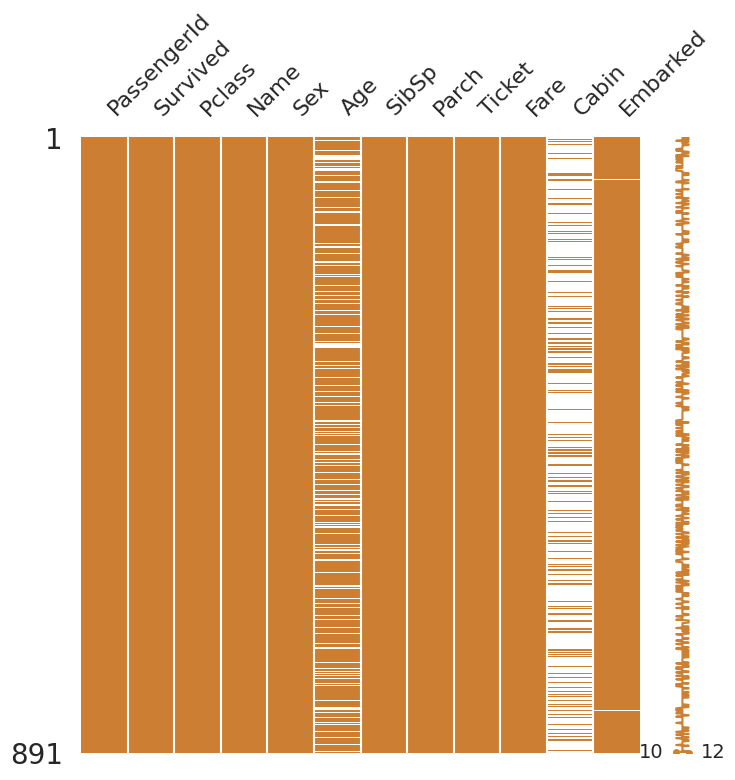

In [12]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # visualisation 해서 null 데이터를 보다 직관적으로 파악하기

<Axes: >

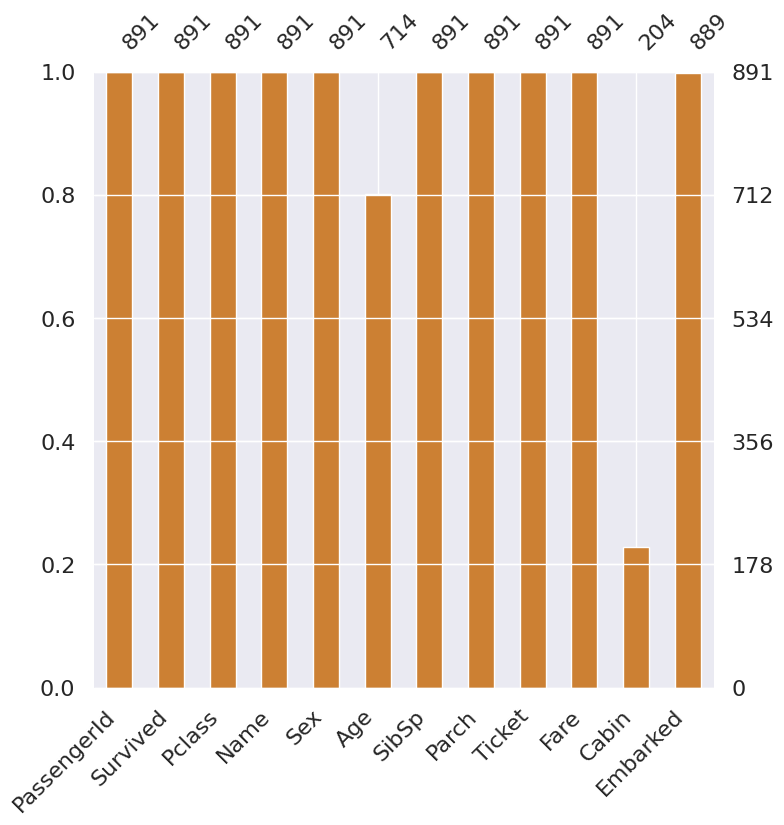

In [13]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # 빈칸은 null (어디 얼마나 있는지 알 수 있는; cabin에 null data가 많이 있다는 것을 파악할 수 있음)

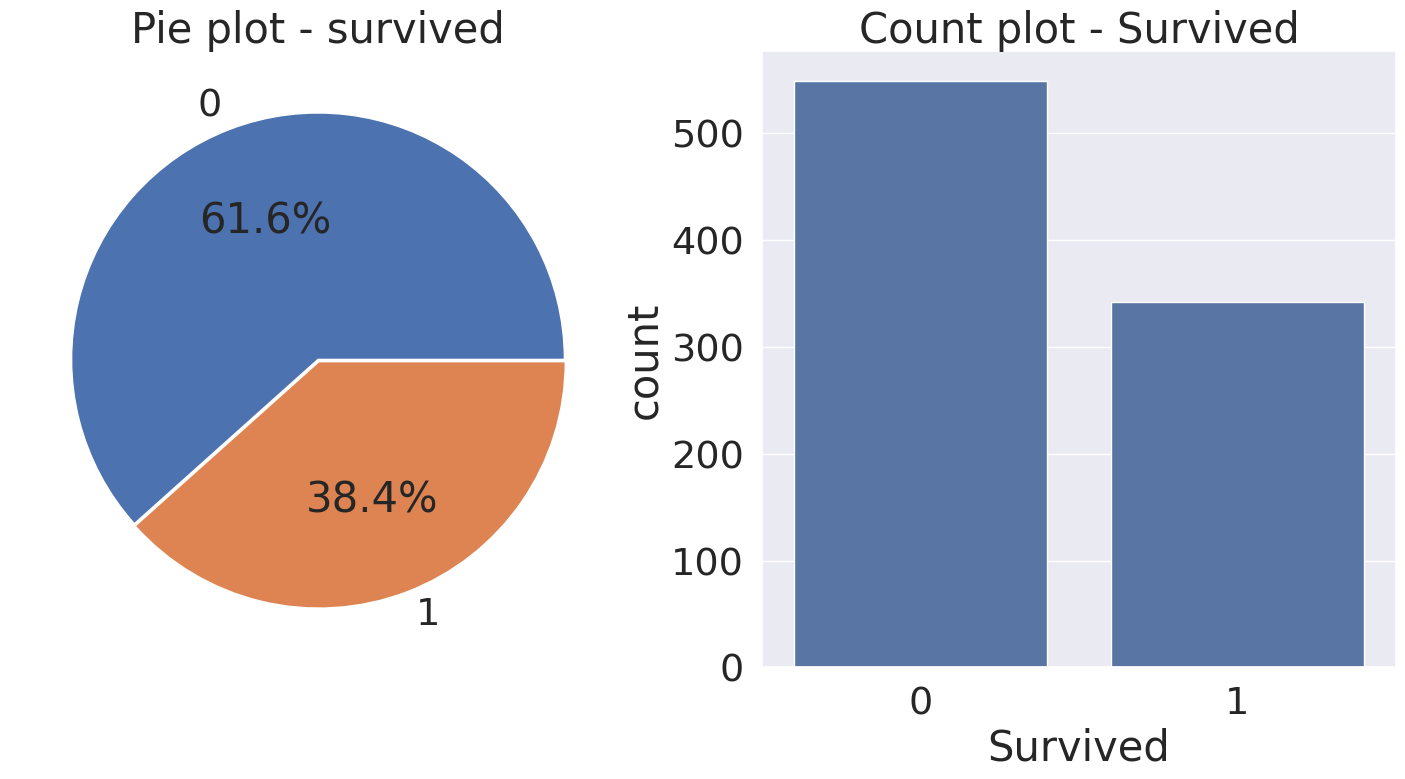

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
#하나씩 뜯어보면 사실 독학이 가능함
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.01], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

#하나의 행에 두개의 그림이 있음

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [17]:
# 본격적인 데이터 분석을 시작

## **본격적인 데이터 분석을 시작**

In [18]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
#분석에 따라 summer 대신 다른 색을 부여할 수도 수 있음
# Use code with caution
# 이 코드는 교차표(Crosstab), 또는 분할표(Contingency Table) 라고 불리는 표를 생성합니다. 이 표는 타이타닉 데이터셋에서 Pclass (승객 등급) 과 Survived (생존 여부) 두 변수 간의 관계를 보여줍니다.

# 표의 내용:

# 표의 행(row)은 Pclass (승객 등급)을 나타냅니다. 1, 2, 3등석과 'All' (전체)이 표시됩니다.
# 표의 열(column)은 Survived (생존 여부)를 나타냅니다. 0 (사망), 1 (생존)과 'All' (전체)이 표시됩니다.
# 표의 각 셀(cell)은 해당 승객 등급과 생존 여부에 해당하는 승객 수를 나타냅니다.
# 예를 들어, 1등석 승객 중 생존자 수, 3등석 승객 중 사망자 수 등을 확인할 수 있습니다.
# 'All' 행과 열은 각각 등급별/생존 여부별 승객 수의 합계를 보여줍니다.
# background_gradient(cmap='summer_r') 부분:


# summer_r 컬러맵을 사용하여 값이 클수록 진한 색상, 값이 작을수록 밝은 색상으로 표시됩니다.
# 요약:


# 이 코드는 타이타닉 데이터셋에서 승객 등급과 생존 여부 간의 관계를 보여주는 교차표를 생성하고, 색상 그라데이션을 적용하여 시각적으로 표현합니다. 이를 통해 데이터 분석가는 두 변수 간의 관계를 더 쉽게 파악하고 분석할 수 있습니다.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

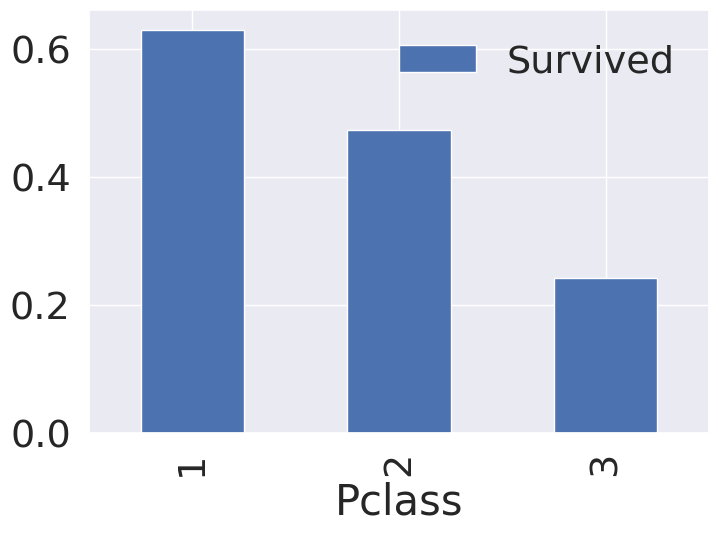

In [19]:
#여기서는 mean으로 분석

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

# groupby(['Pclass'], as_index=True): This line groups the data based on the 'Pclass' column (passenger class). The crucial part is as_index=True. This setting ensures that the 'Pclass' column becomes the index of the resulting DataFrame after the grouping operation.
#p class가 좋을수록 생존률이 높음.
#단계적으로 visaulisation 하면서 코드 더욱 정확하게 익힐 수 있도록 할 것

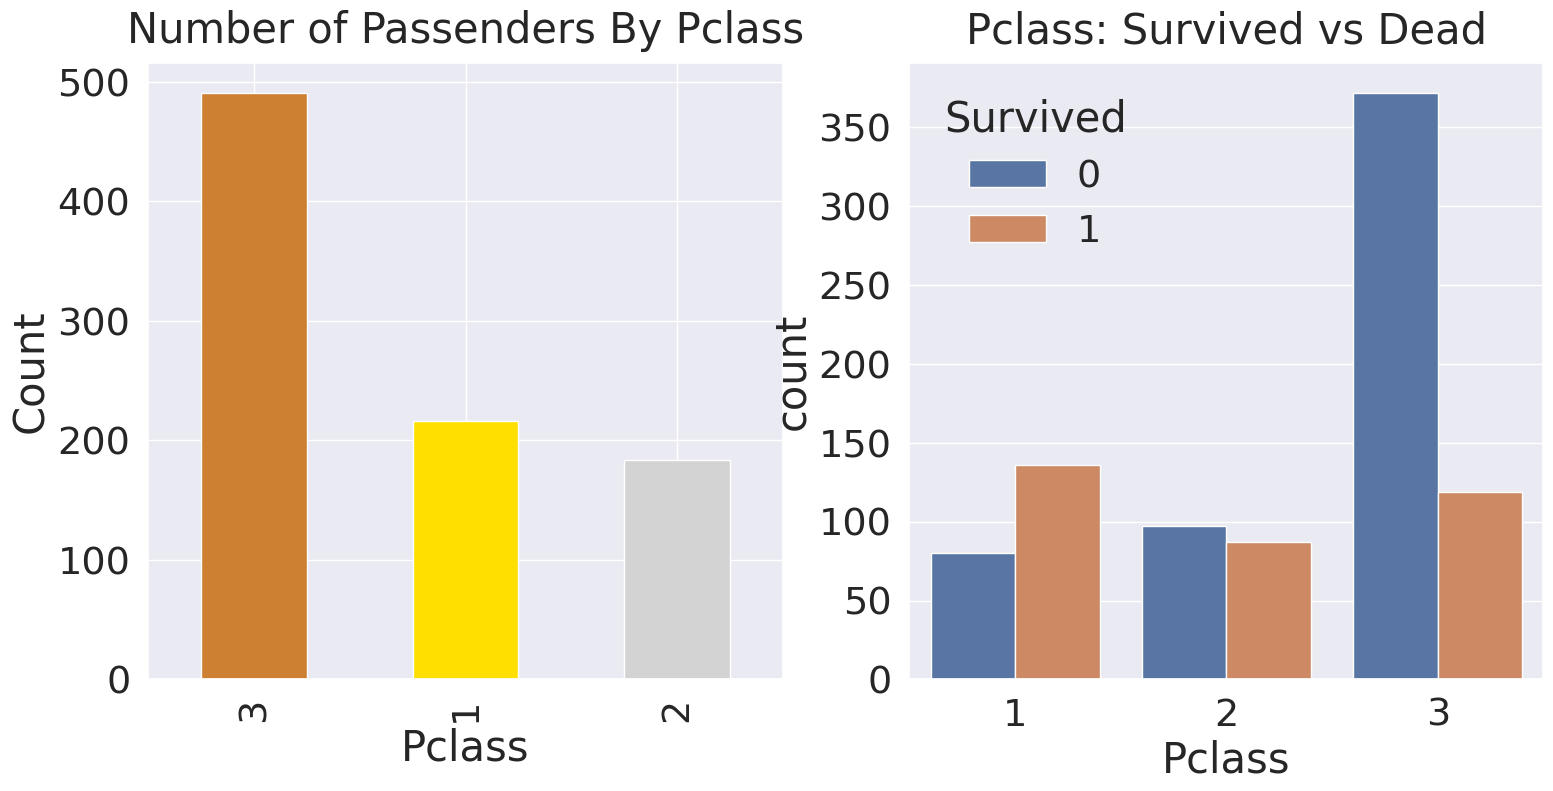

In [20]:
#그래프를 좀 더 직관적으로 그려보기

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # Now plt is defined and accessible here
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passenders By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()


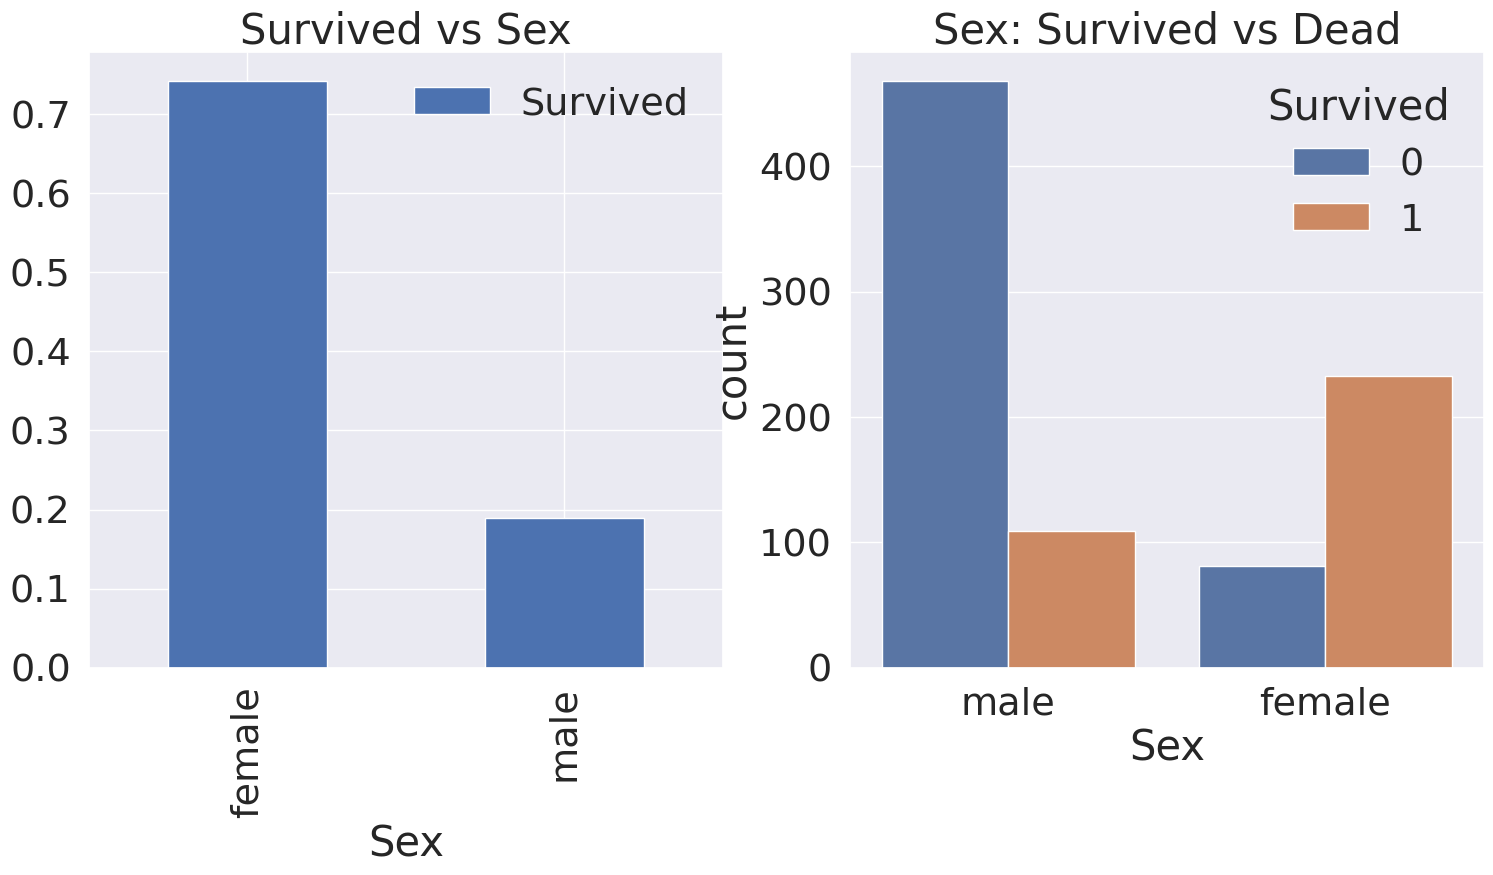

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show() #성별로 나누었을 때 여성의 생존 확률이 높았음

In [22]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#sex로 group by 하고 survived 의 mean 값을 오름차순하기

,Sex,Survived
0,female,0.742038
1,male,0.188908


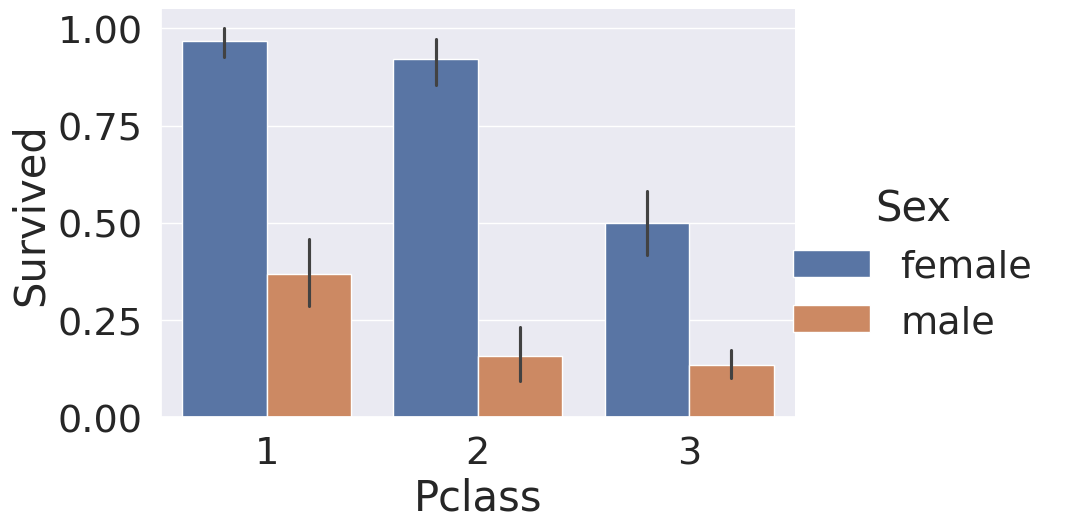

In [23]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='bar', height=6, aspect=1.5)


<Axes: xlabel='Pclass', ylabel='Survived'>

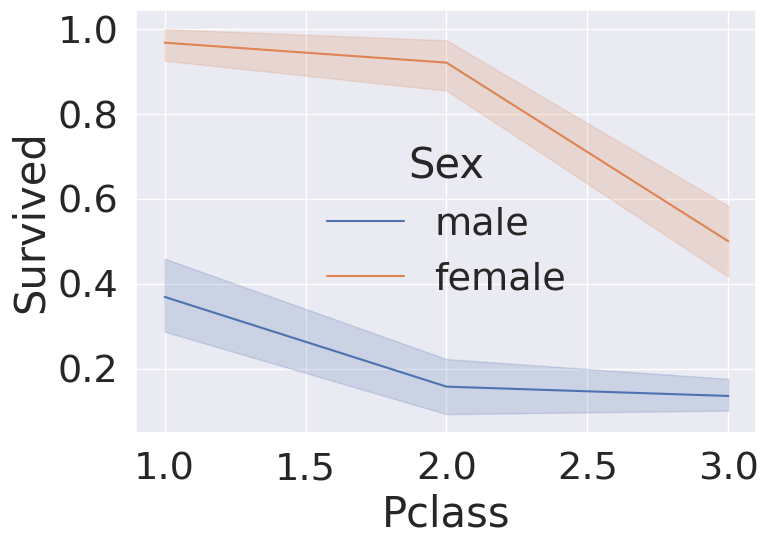

In [24]:
sns.lineplot(x='Pclass', y='Survived', hue='Sex', data=df_train)


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

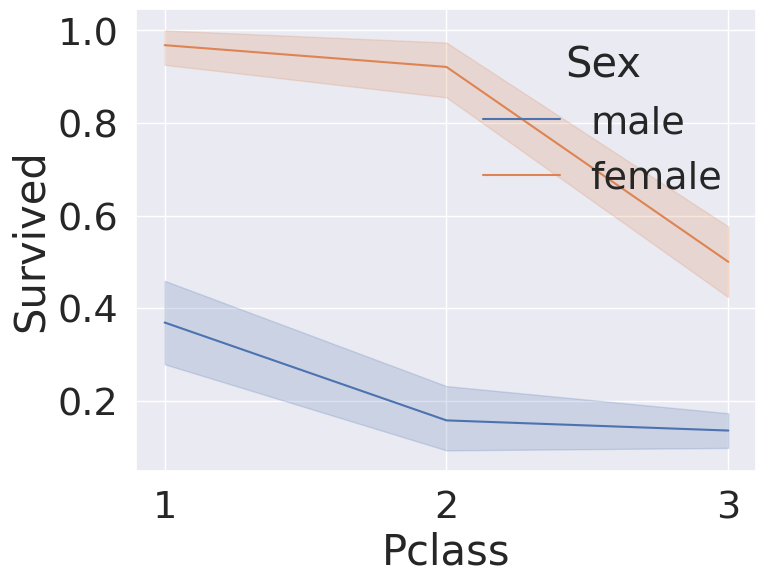

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(x='Pclass', y='Survived', hue='Sex', data=df_train)
ax.set_xticks([1, 2, 3])  # Set x-axis ticks to only show 1, 2, and 3
plt.show()

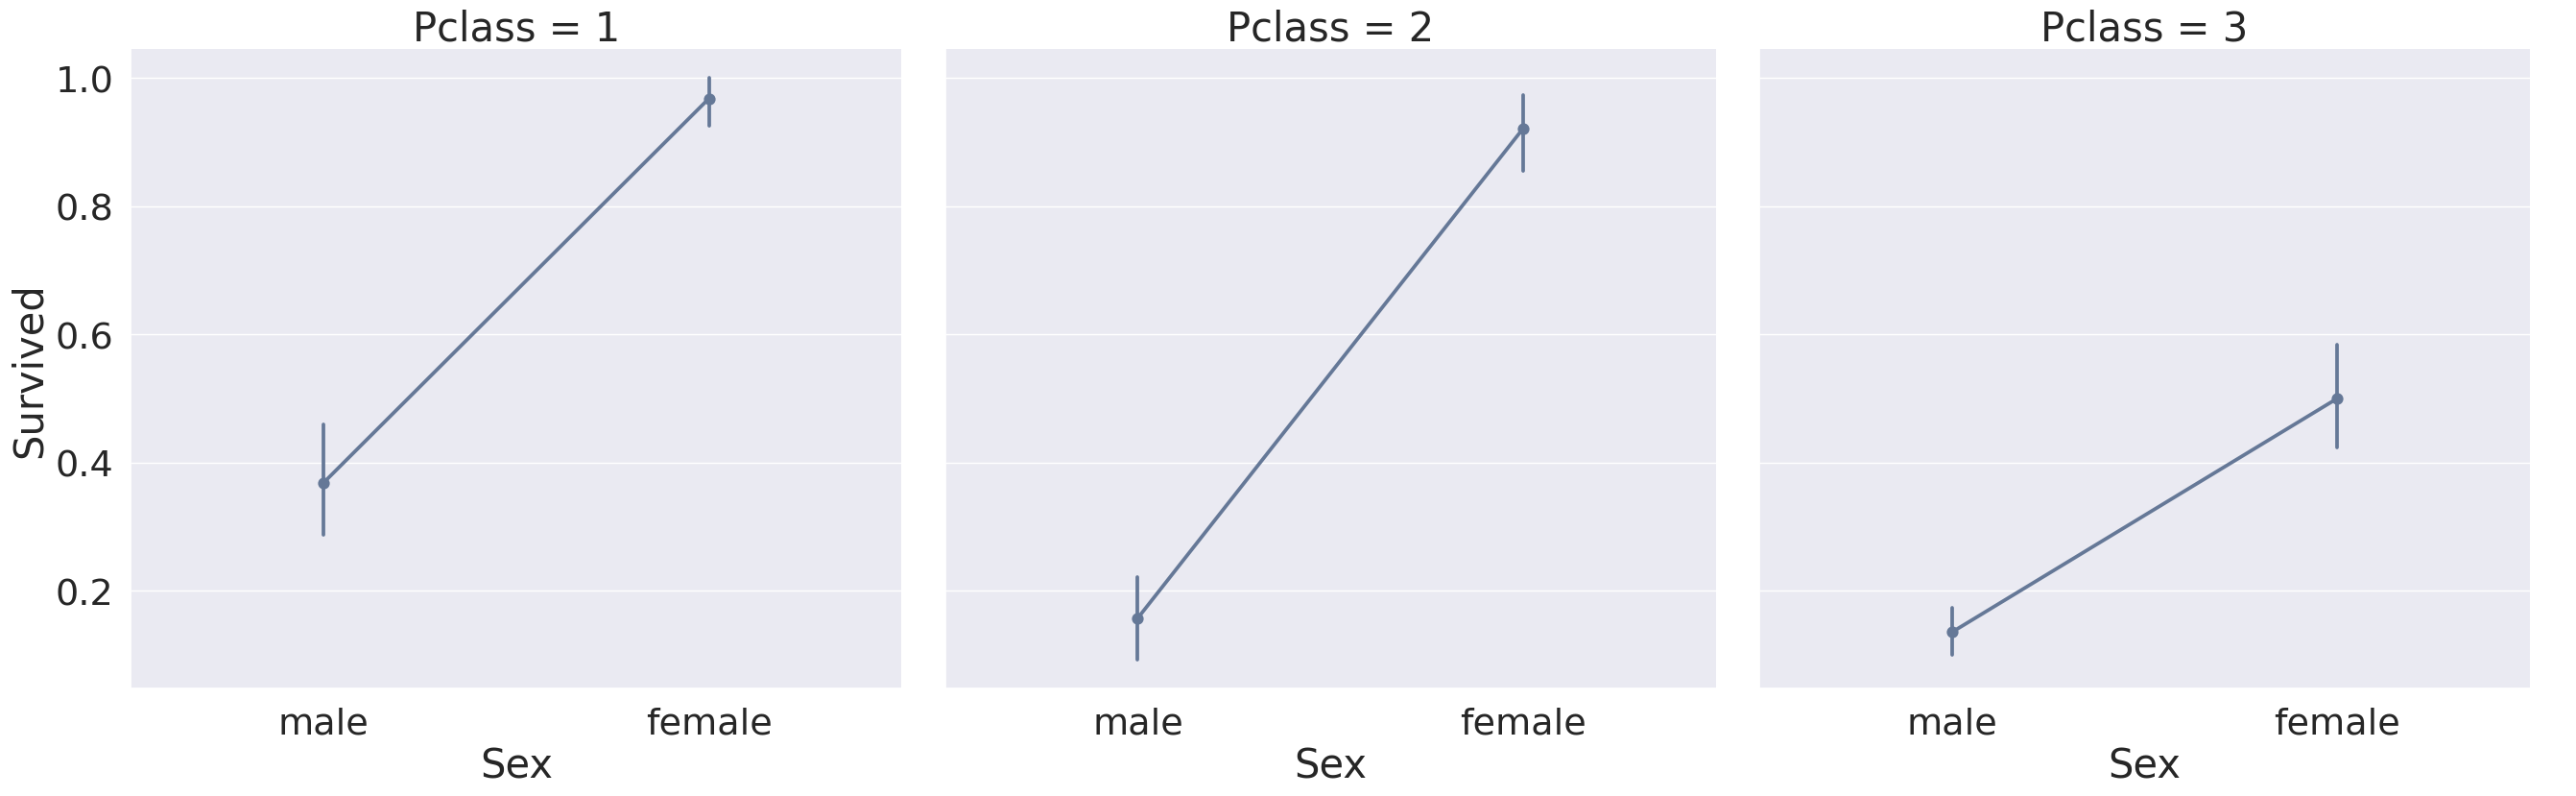

In [27]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='point', saturation=.5, height=9, aspect=1)

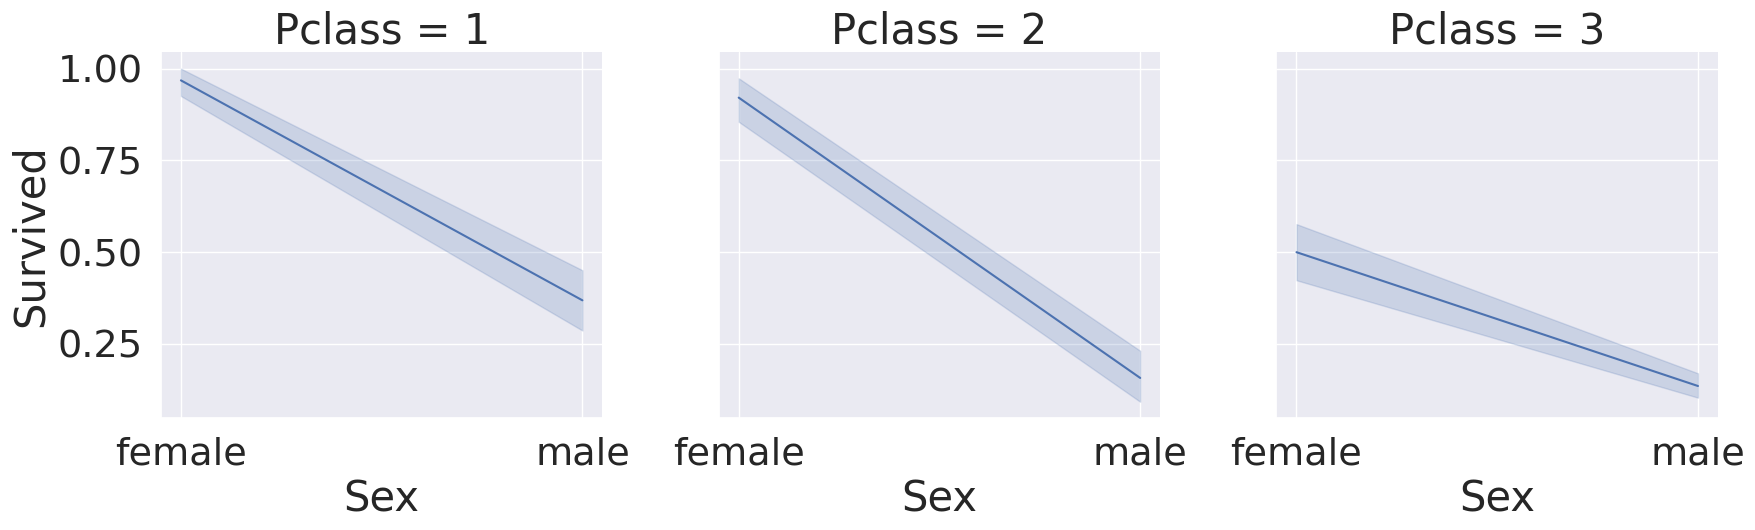

In [28]:
sns.relplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='line', height=6, aspect=1)


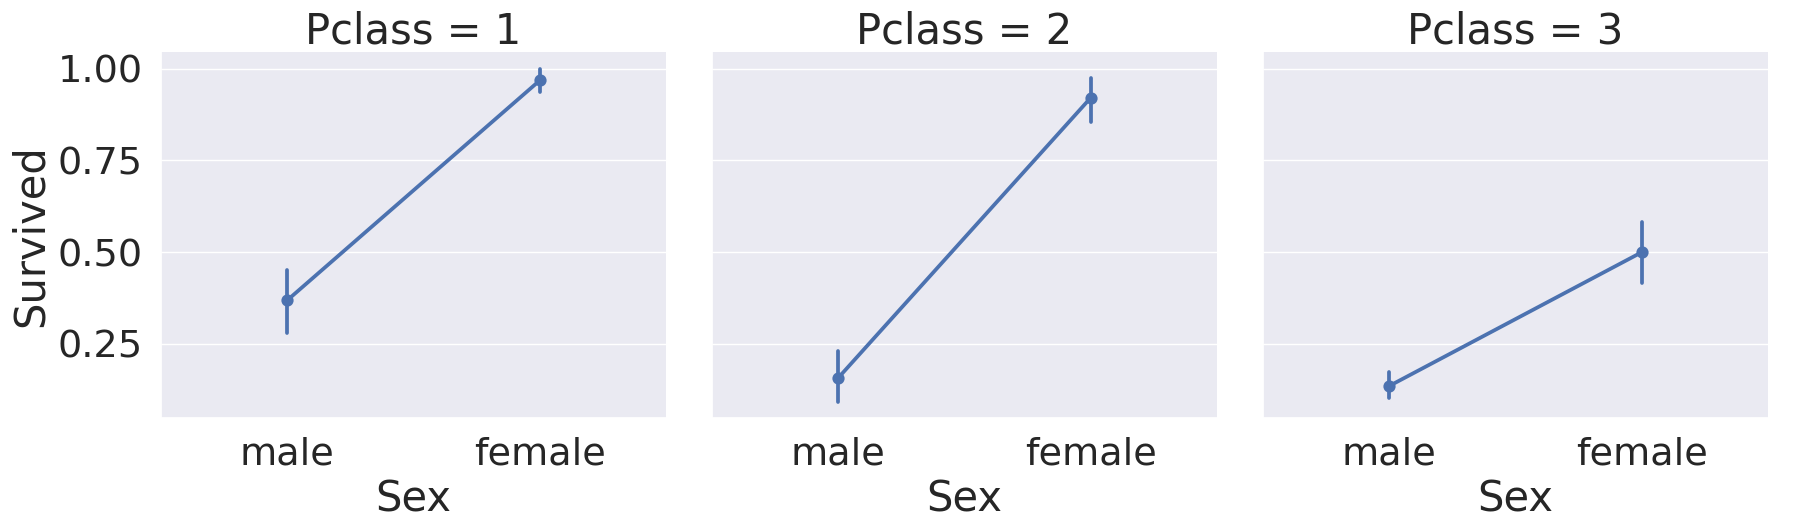

In [29]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='point', height=6, aspect=1, order=['male', 'female'])


In [30]:

print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))
#Use code with caution


제일 나이 많은 탑승객 : 80.0 Years
제일 나이 적은 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


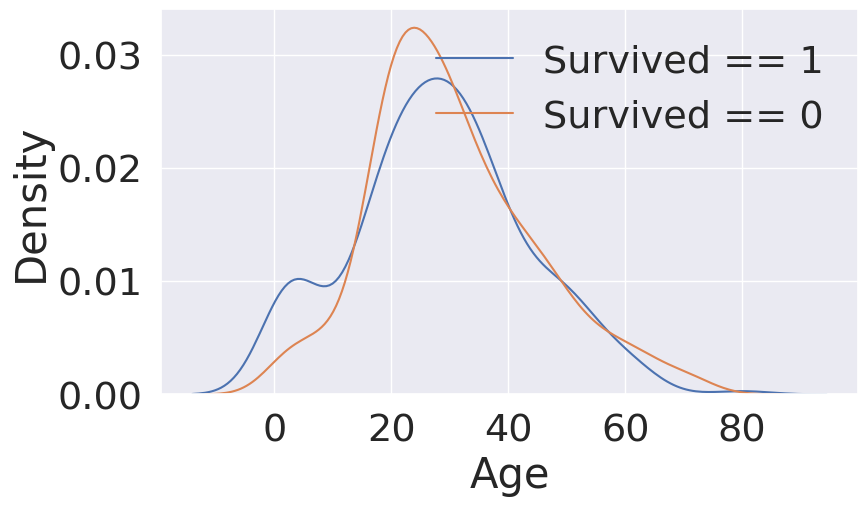

In [31]:
#생존에 따른 히스토그램 써보기

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<Axes: ylabel='Density'>

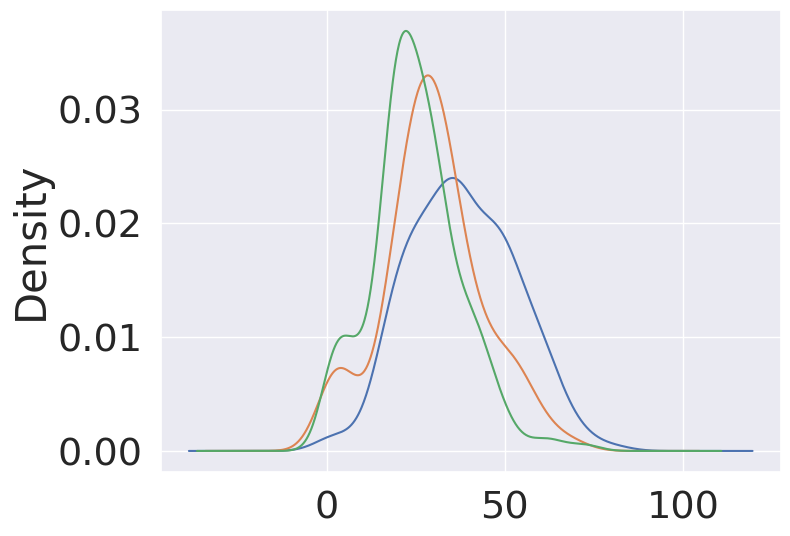

In [32]:
#age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

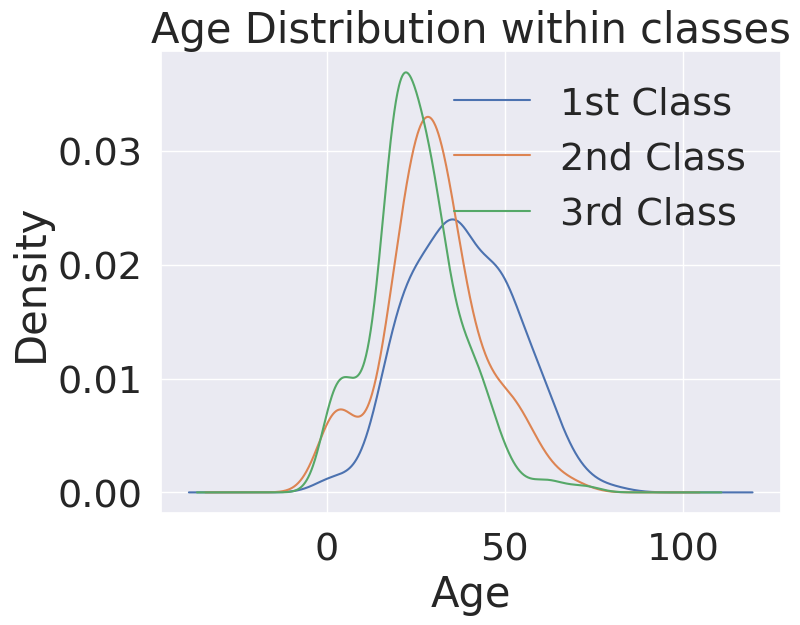

In [33]:
#age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age') # xlable을 xlabel로 수정
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])


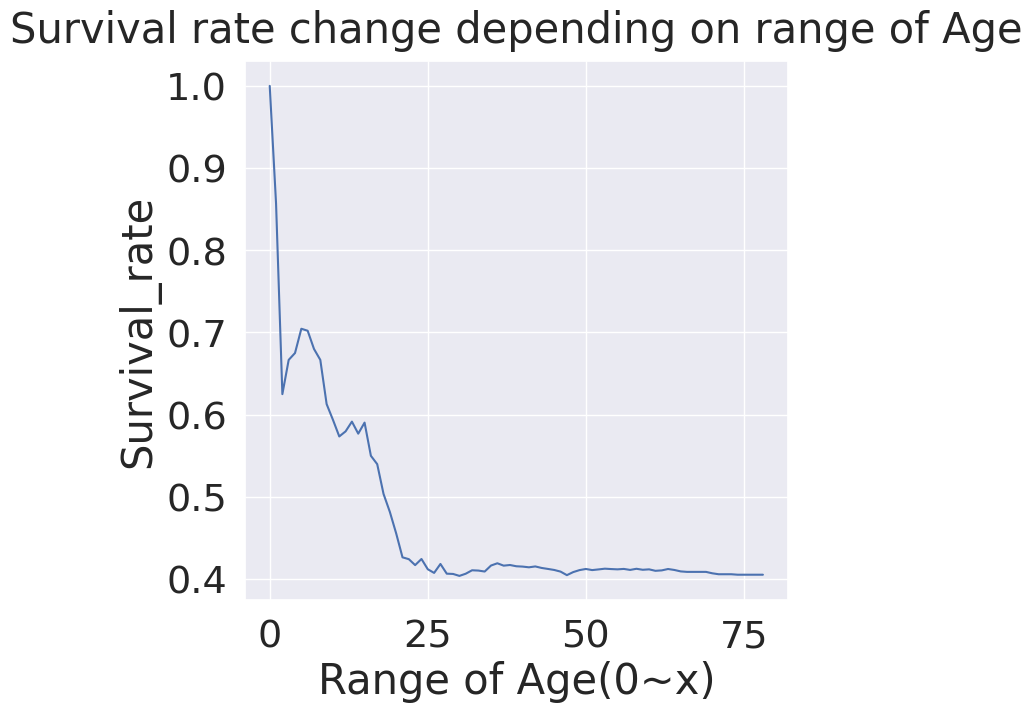

In [34]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival_rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

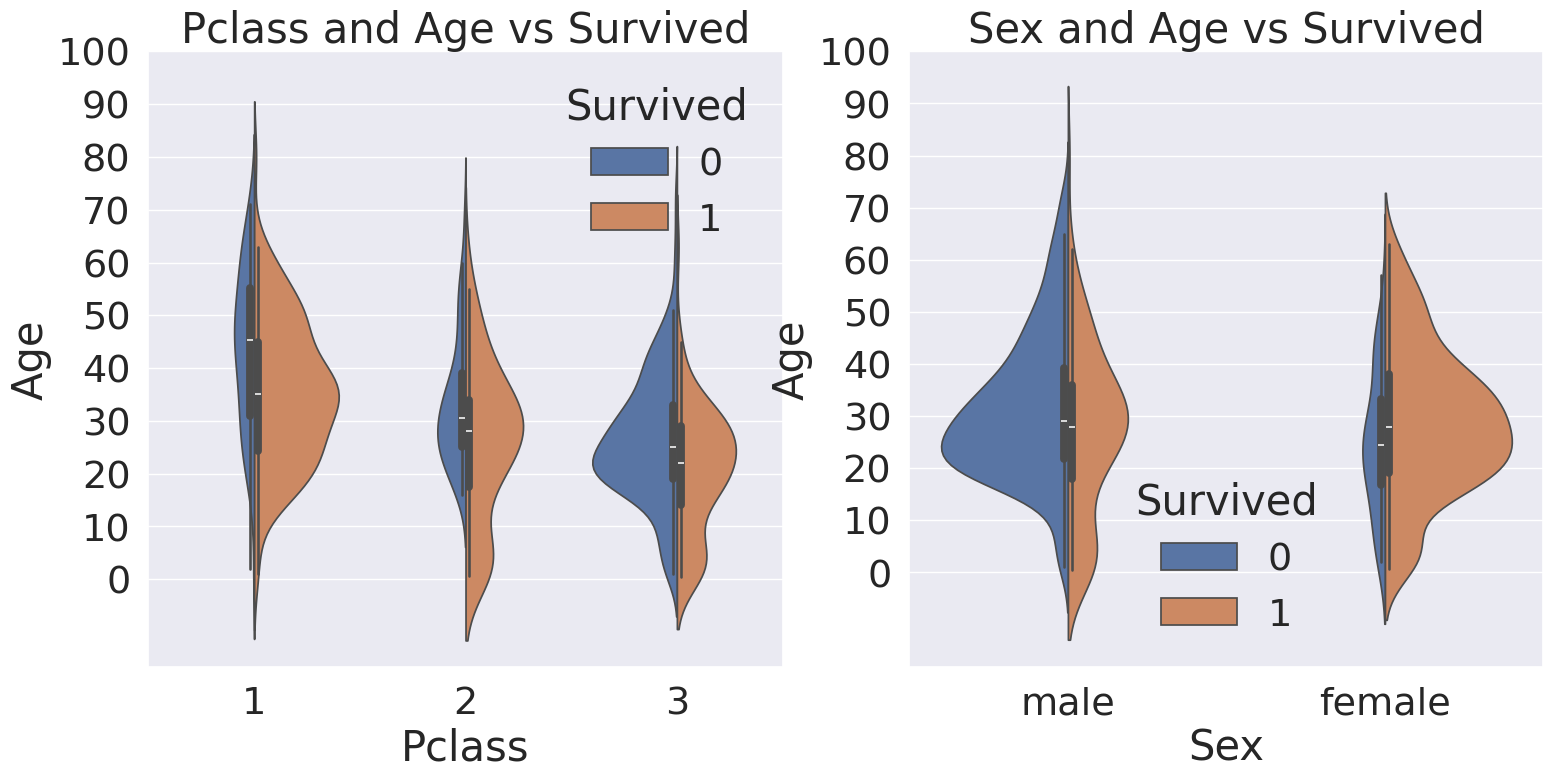

In [35]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# data를 키워드 인수로 전달
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# data를 키워드 인수로 전달
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

## **2.6. Embarked**

<Axes: xlabel='Embarked'>

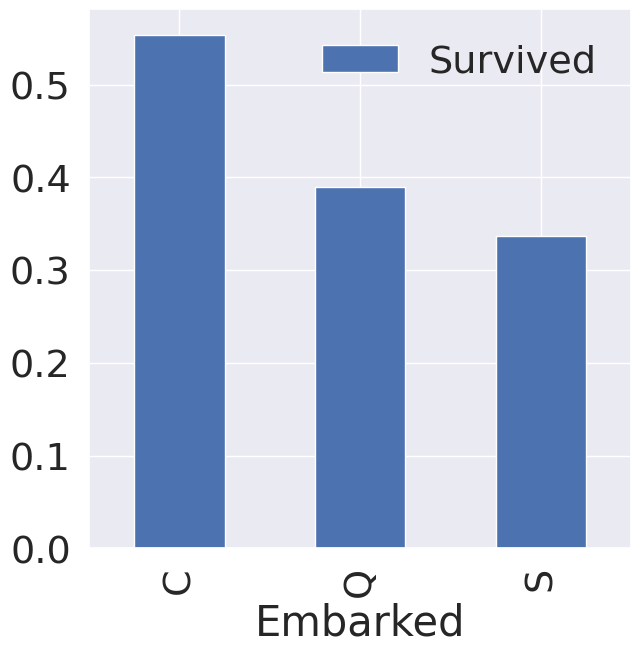

In [36]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']]. groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

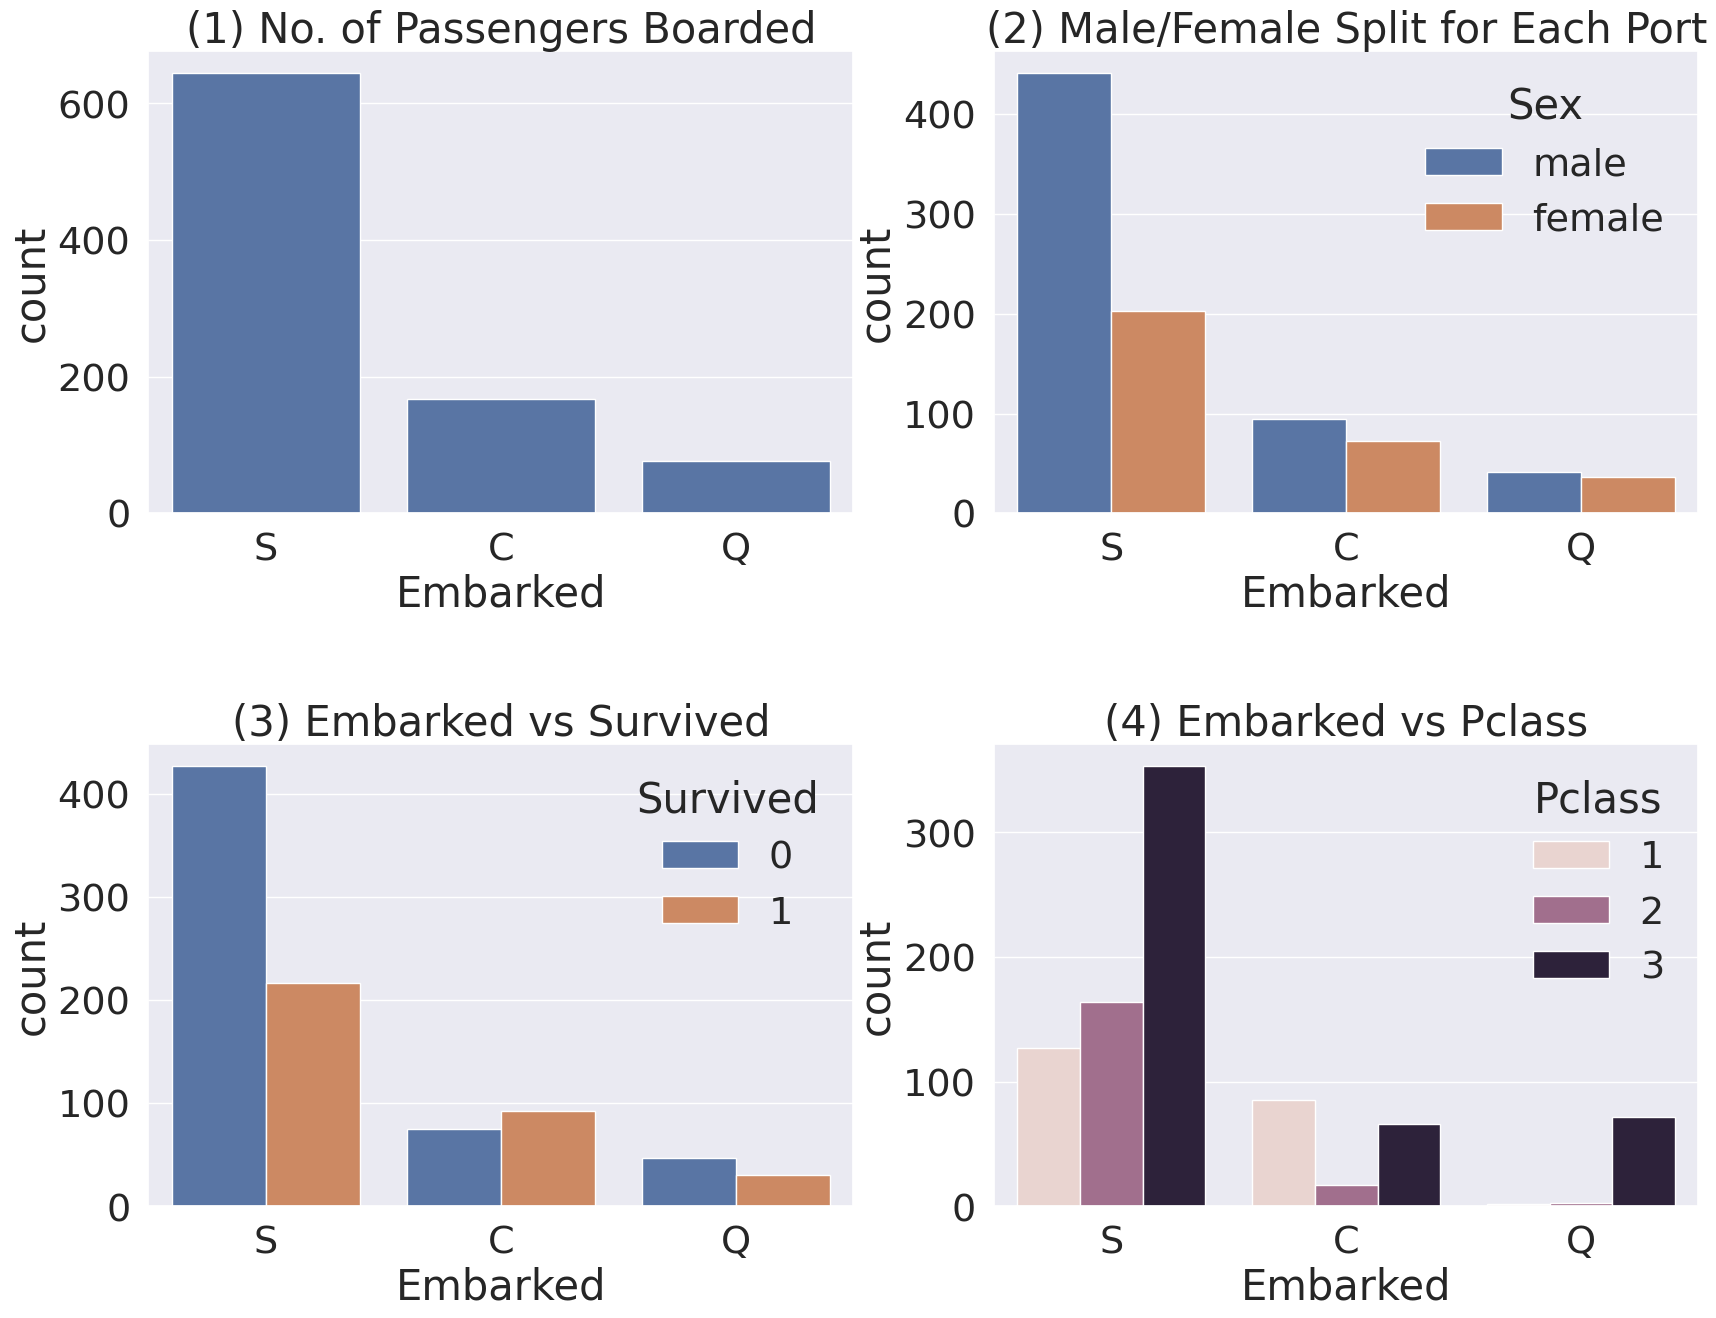

In [37]:
# 2행 2열짜리 subplot 생성, 전체 그림 크기는 20x15로 설정
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# (1) Embarked(탑승 항구)별 승객 수 분포
# → 탑승 항구는 C(Cherbourg), Q(Queenstown), S(Southampton)로 분류됨
# → 어떤 항구에서 많이 탑승했는지 파악 가능 (예: 대부분 S에서 탑승)
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')

# (2) Embarked vs Sex (성별 분포)
# → 각 항구에서 남성과 여성 승객이 얼마나 탑승했는지 비교
# → 항구마다 성별 비율이 다를 수 있음 (예: 특정 항구에 여성 승객이 많았다면 구조 확률도 영향을 받을 수 있음)
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male/Female Split for Each Port')

# (3) Embarked vs Survived (생존률 분포)
# → 탑승 항구별 생존/사망 비율 분석
# → 특정 항구에서 탑승한 승객이 상대적으로 높은 생존률을 보인다면 구조 시 우선순위 혹은 계급 비율 차이 때문일 수도 있음
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

# (4) Embarked vs Pclass (탑승 클래스 분포)
# → 각 항구별로 어떤 사회계층(Pclass)의 승객이 많이 탑승했는지 확인 가능
# → 계급(Pclass)은 생존률과 밀접한 상관관계가 있기 때문에 중요 포인트
# → 예: 특정 항구에서 1등석 승객이 많이 탑승했다면 생존률도 높게 나올 수 있음
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

# subplot 간 간격 조정 (너무 붙지 않도록 여백 조절)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# 시각화 결과 출력
plt.show()

## **Family - sibsp + parch**

In [38]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1


In [39]:
print("Maxium size of Faily: ", df_train['FamilySize'].max())
print("Minimum size of Faily: ", df_train['FamilySize'].min())

Maxium size of Faily:  11
Minimum size of Faily:  1


Family Size 와 생존의 관계 살펴보기

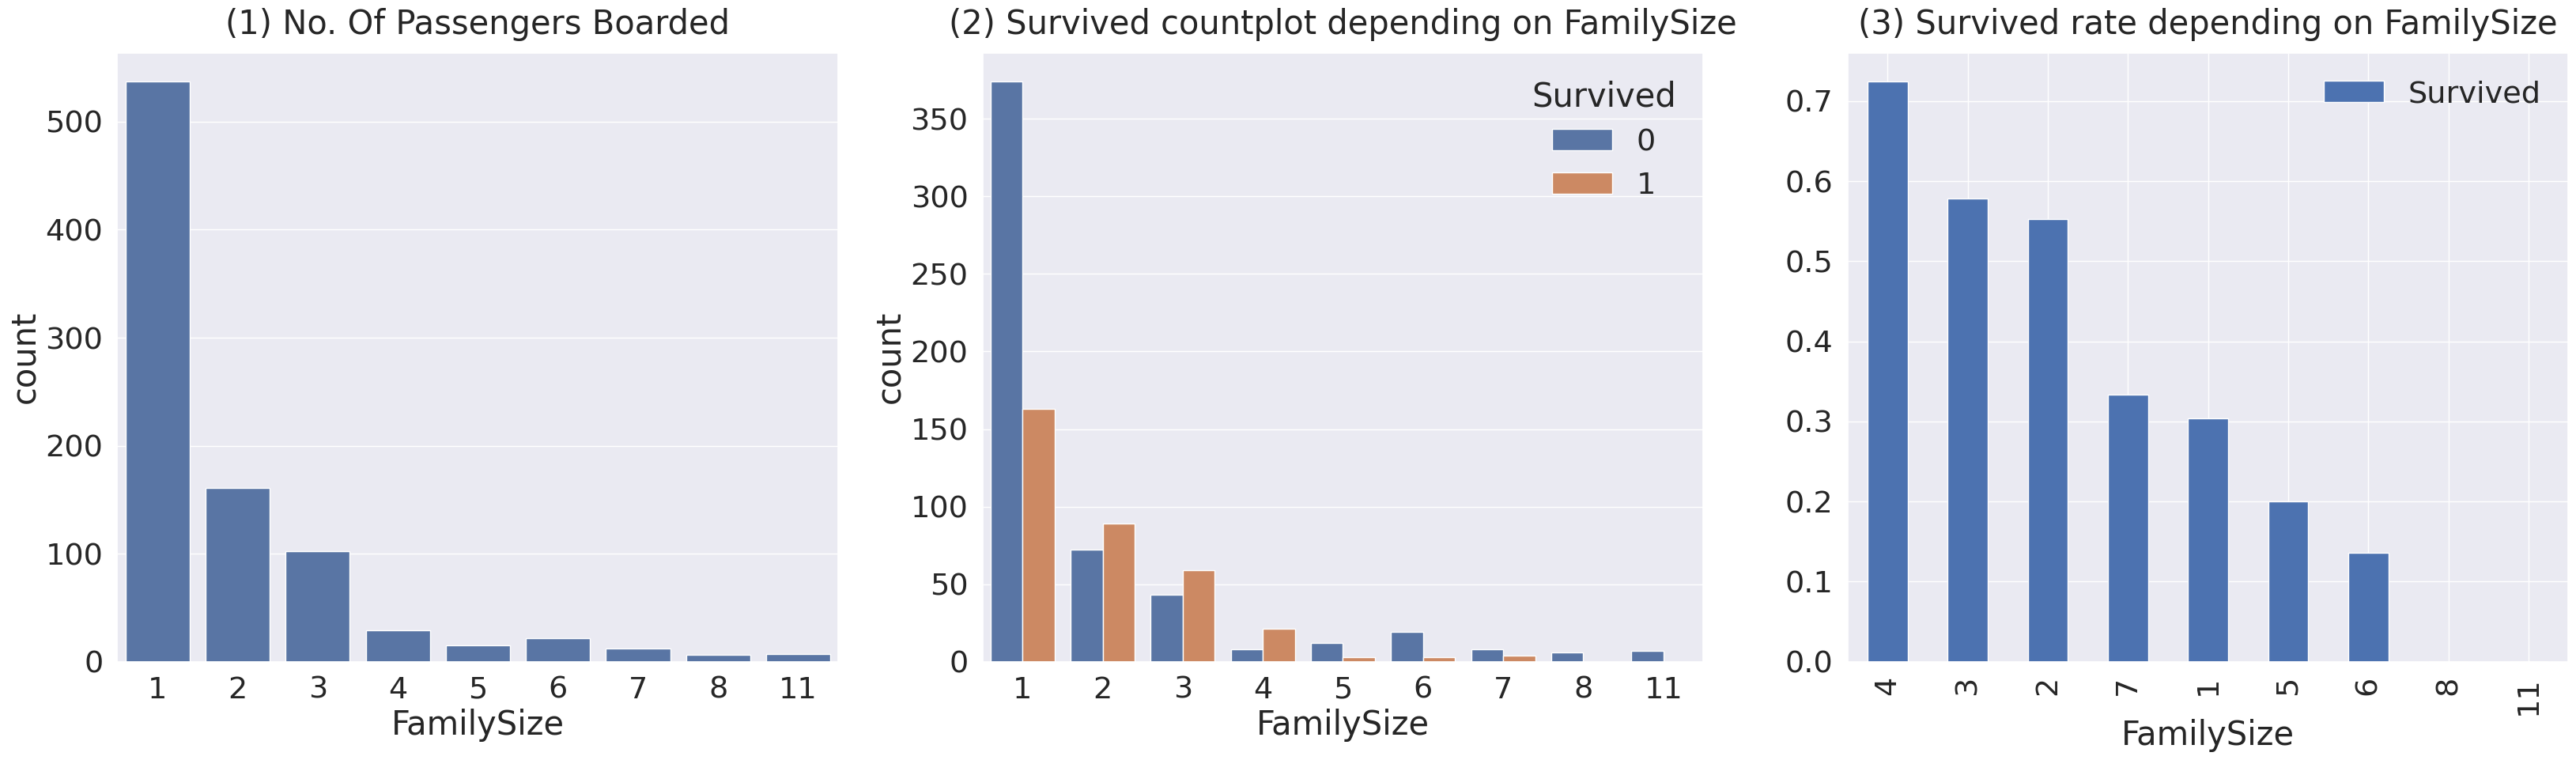

In [42]:


# 1행 3열짜리 subplot 생성, 전체 그림 크기는 매우 크게 설정 (폭 40, 높이 10)
f, ax = plt.subplots(1, 3, figsize=(40, 10))

# (1) 가족 수(FamilySize)에 따른 전체 탑승자 수 분포
# → 각 FamilySize(= 본인 포함한 가족 수) 값에 몇 명의 승객이 있었는지 보여줌
# → 특정 가족 크기가 많은 비중을 차지했는지 확인 가능
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

# (2) 가족 수에 따른 생존/사망 카운트 비교
# → hue='Survived'로 생존 여부에 따라 다른 색으로 표시
# → 가족 크기가 생존율에 영향을 주었는지 육안으로 판단 가능
# → 예: 가족이 너무 많거나 너무 적으면 생존률이 낮아질 수 있음
sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

# (3) 가족 수별 생존 **비율** 막대그래프
# → groupby로 FamilySize별로 평균 생존률 계산 (Survived=1이면 생존, 0이면 사망)
# → sort_values로 생존율 높은 순으로 정렬
# → 어떤 가족 수에서 생존률이 가장 높았는지 확인 가능
df_train[['FamilySize', 'Survived']]\
    .groupby(['FamilySize'], as_index=True)\
    .mean()\
    .sort_values(by='Survived', ascending=False)\
    .plot.bar(ax=ax[2])  # ⛔ 오타 수정 필요: 'assending' → 'ascending'
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

# subplot 사이 간격 조정 (가로, 세로 여백 설정)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# 최종 시각화 출력
plt.show()


# Fare

Text(0.5, 1.0, 'Distribution of Fare with Skewness')

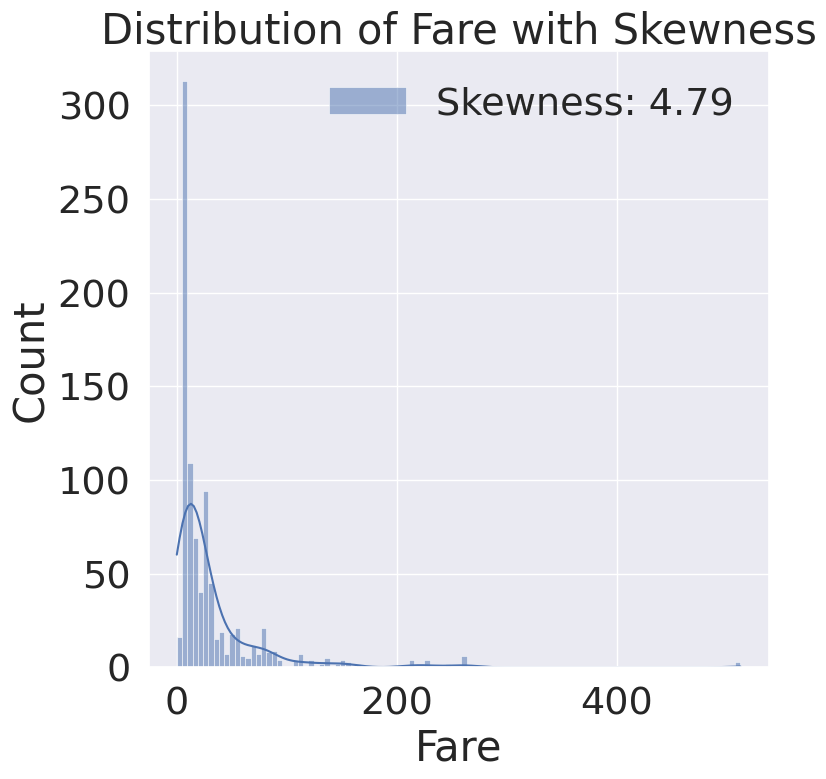

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# 왜도 계산
fare_skew = df_train['Fare'].skew()

# 요금 분포 시각화: histogram + KDE 곡선
sns.histplot(df_train['Fare'], kde=True, color='b', ax=ax, label='Skewness: {:.2f}'.format(fare_skew))

# 범례 표시
ax.legend(loc='best')
ax.set_title('Distribution of Fare with Skewness')

#distribution이 매우 비대칭이므로 fare 를 log에 넣어줄 것, 대부분의 사람들이 3등석 fare를 내고 탔다는 말 맞음

In [46]:
# -----------------------------
# ❗ Fare 전처리
# -----------------------------
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()  # 결측값을 평균으로 대체
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)  # 로그 변환 (0 제외)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)    # 테스트셋도 로그 변환

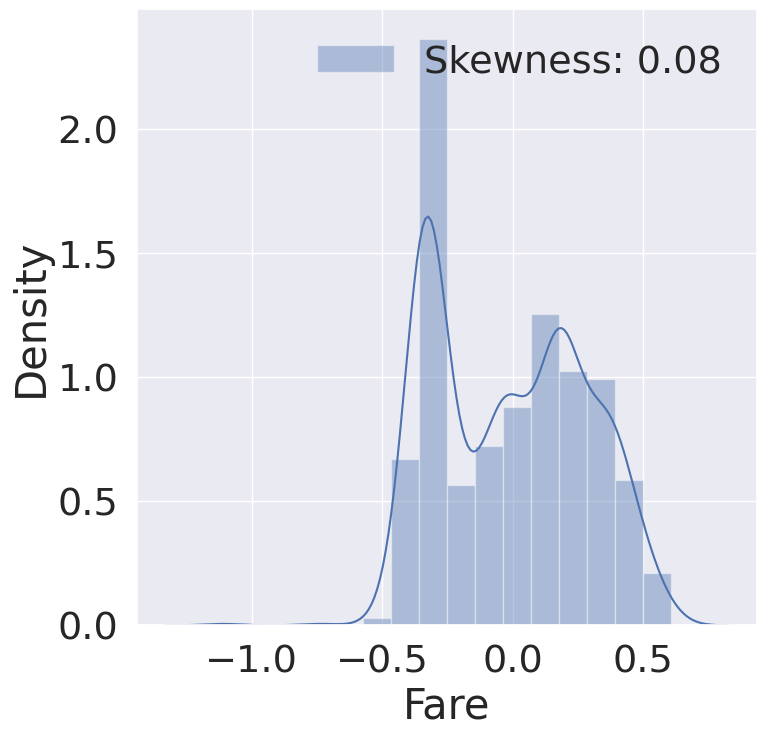

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))  # 1개의 그래프(fig), 크기는 8x8
g = sns.distplot(df_train['Fare'], color='b',        # Fare 컬럼의 분포를 파란색으로 표시 (히스토그램 + KDE 곡선)
                 label='Skewness: {:.2f}'.format(df_train['Fare'].skew()),  # 왜도(Skewness) 값을 레이블에 표시
                 ax=ax)
g = g.legend(loc='best')  # 범례 표시 (위치 자동 조정)
#log 는 사실 feacture engineering 부분에서 많이 사용함

# **2.9 Cabin**

In [50]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.380379,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.372137,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.318060,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.321586,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.307761,NaN,S,1


# 2.10 **Ticket**

In [51]:
df_train['Ticket'].value_counts() #타이타닉 데이터셋에서 Ticket 컬럼의 값들이 얼마나 자주 등장하는지 확인

,count
Ticket,
347082,7
1601,7
CA. 2343,7
3101295,6
CA 2144,6
...,...
PC 17590,1
17463,1
330877,1
